
# aSPEM Experiment : analysis

https://scikit-learn.org/stable/auto_examples/neighbors/plot_nearest_centroid.html#sphx-glr-auto-examples-neighbors-plot-nearest-centroid-py




TODO: tester qu'à chaque pause, l'agent se réinitialise à $\hat{p}=.5$

In [1]:
%load_ext autoreload
%autoreload 2
#from __future__ import division, print_function, absolute_import
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np

from aSPEM import aSPEM
import bayesianchangepoint as bcp

%matplotlib inline

In [2]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)

In [3]:
list_sujet = ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN','YK']

nb_sujet = len(list_sujet)
COLOR = ['b', 'r', 'k', 'g', 'm', 'c',
         'darkblue', 'darkred', 'peru', 'darkgreen', 'darkmagenta', 'darkcyan'] #[(0+(1/nb_sujet)*n, 0, 0, 0.5) for n in range(nb_sujet)]

In [4]:
from aSPEM import Analysis
e = Analysis(name_file_fit='fct_velocity_sigmo')

In [5]:
fig_width = 15
t_titre = 70
t_label = (30*4)/3

## Data Scalling

In [6]:
data_scalling = e.Data_Scalling()
new_bet, new_va = data_scalling['new_bet_full'], data_scalling['new_va_full']

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Find h

In [7]:
h_bet_m, h_va_m = e.Find_h(new_bet, new_va, modes_bcp='mean')

AM BMC CS DC FM IP LB OP RS SR TN YK 

In [8]:
h_bet_l, h_va_l = e.Find_h(new_bet, new_va, modes_bcp='leaky')

AM BMC CS DC FM IP LB OP RS SR TN YK 

In [9]:
def scatter_mean(h_bet, h_va, maxx=0.55, maxy=0.25, minx=0, miny=0, ex=0.02, ey=0.01, log=True, cent=False, 
                 triangle=True, color=False, mean='mean', title=None, fig_width=10, axs=None) :
    
    if triangle is True : from matplotlib.patches import Polygon
    
    if axs is None : fig, ax = plt.subplots(1, 1, figsize=((fig_width), (fig_width)), constrained_layout=True) #/(1.6180*1))
    else :                ax = axs
    
    if title is not None: ax.set_title(title, fontsize=t_label*2)
    
    if type(h_bet)==dict :
        list_bet, list_va, l_100_bet, l_100_va = [], [], [], []
        for s in list_sujet :
            list_bet.append(h_bet['block'][s]) ; list_va.append(h_va['block'][s])
            l_100_bet.append(h_bet['100'][s]) ; l_100_va.append(h_va['100'][s])
        bet, va = list_bet, list_va
    
    m_bet, m_va = [], []
    for x in range(len(bet)):
        if color is False : c = 'k'
        else :              c = color[x]
        
        if cent is True : ax.scatter(l_100_bet[x], l_100_va[x], color=c,  s=25, alpha=0.9)
        
        if triangle is True :
            c_b = ['k', 'grey', 'r']
            #for b in range(3) : axs.scatter(bet[x][b], va[x][b], c=c, s=50)
            baba = np.array([[bet[x][y], va[x][y]] for y in range(len(va[x]))])
            poly = Polygon(baba, color=c, alpha=0.2, lw=2)
            ax.add_artist(poly)
            
        if mean=='mean' :      mean_bet, mean_va = np.mean(bet[x]),   np.mean(va[x])
        elif mean=='mediane' : mean_bet, mean_va = np.median(bet[x]), np.median(va[x])           
        
        #if log is False :
        #    if triangle is True :
        #        #axs.scatter(mean_bet, mean_va, color=c,  s=50, alpha=0.9)
        #        axs.text(mean_bet, mean_va, list_sujet[x], fontsize=12, va='center', ha='center')
            
        m_bet.append(mean_bet)
        m_va.append(mean_va)

    ax.plot(np.arange(-10,10), np.arange(-10,10), '--k')
    ax.vlines(0.025, -ey, 0.025, colors='k') ; ax.hlines(0.025, -ex, 0.025, colors='k')

    if log: ax.set_xscale('log') ; ax.set_yscale('log')
    ax.set_xlabel('h$_{bet}$', fontsize=t_label) ; ax.set_ylabel('h$_{v_a}$', fontsize=t_label)
    ax.tick_params(axis='both', labelsize=t_label/1.8)
    ax.axis([minx-ex ,maxx+ex,miny-ey,maxy+ey])
    
    if axs is None :
        fig.tight_layout()
        return fig, ax
    else : return ax

In [10]:
COLOR = ['crimson', 'saddlebrown', 'k', 'darkseagreen', 'dimgrey', 'teal',
         'slateblue', 'firebrick', 'peru', 'darkolivegreen', 'goldenrod', 'darkcyan']

Moyenne par Sujet block log


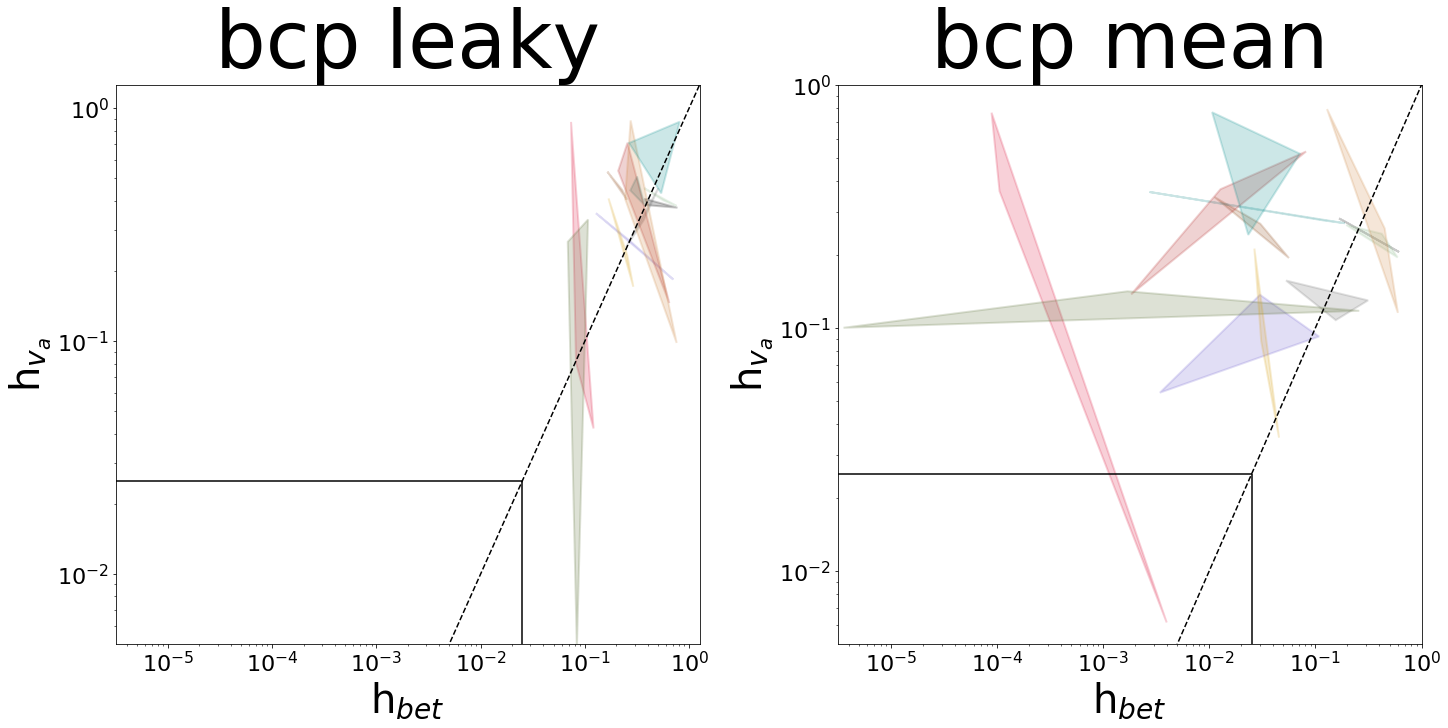

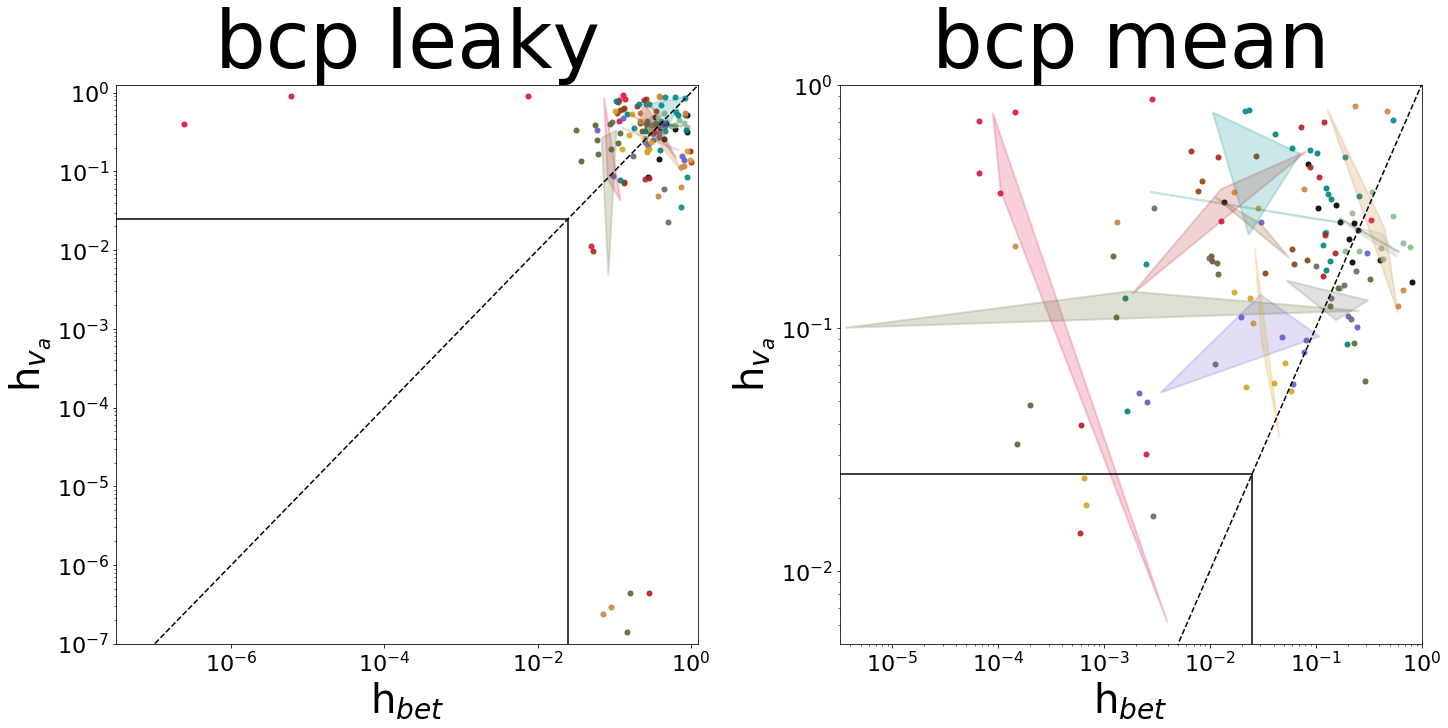

In [11]:
print('Moyenne par Sujet block log')
#--------------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(10*2, 10), constrained_layout=True)
ax[0] = scatter_mean(h_bet_l, h_va_l, axs=ax[0], title='bcp leaky',
                     maxx=10**0.1, maxy=10**0.1, minx=10**-5.5, miny=10**-2.3,
                     ex=0, ey=0, color=COLOR, cent=False)

ax[1] = scatter_mean(h_bet_m, h_va_m, axs=ax[1], title='bcp mean',
                     maxx=10**0, maxy=10**0, minx=10**-5.5, miny=10**-2.3,
                     ex=0, ey=0, color=COLOR, cent=False)

#--------------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(10*2, 10), constrained_layout=True)
ax[0] = scatter_mean(h_bet_l, h_va_l, axs=ax[0], title='bcp leaky',
                     maxx=10**0.1, maxy=10**0.1, minx=10**-7.5, miny=10**-7,
                     ex=0, ey=0, color=COLOR, cent=True)

ax[1] = scatter_mean(h_bet_m, h_va_m, axs=ax[1], title='bcp mean',
                     maxx=10**0, maxy=10**0, minx=10**-5.5, miny=10**-2.3,
                     ex=0, ey=0, color=COLOR, cent=True)

#for ext in exts: fig.savefig(f'{msfigpath}/5_inter-individual_differences_fit' + ext, dpi=dpi)

## Calcule MI

In [12]:
Full = e.Full_list()

In [13]:
def mutual_information(hgram):
    """ Mutual information for joint histogram
    https://matthew-brett.github.io/teaching/mutual_information.html"""
    # Convert bins counts to probability values
    pxy = hgram / float(np.sum(hgram))
    px = np.sum(pxy, axis=1) # marginal for x over y
    py = np.sum(pxy, axis=0) # marginal for y over x
    px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
    # Now we can do the calculation using the pxy, px_py 2D arrays
    nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

def mumu(p, data) :
    hist, x_edges, y_edges = np.histogram2d(p, data ,bins=20)
    return mutual_information(hist)

In [14]:
def find_mumu(h_bet, h_va) :
    HBET, HVA = [], []
    for suj in list_sujet :
        HBET.extend(h_bet['block'][suj])
        HVA.extend(h_va['block'][suj])
    
    print('h_bet : mean=%s, std=%s'%(np.nanmean(HBET), np.nanstd(HBET)))
    print('h_va : mean=%s, std=%s'%(np.nanmean(HVA), np.nanstd(HVA)))
    
    mu_bet,mu_va = [], []
    for suj in list_sujet :
        for b in range(3) :
            result = Full[Full.sujet==suj]['results'][200*b:200*(b+1)]
            va = Full[Full.sujet==suj]['va'][200*b:200*(b+1)]

            bino = Full[Full.sujet==suj]['bino'][200*b:200*(b+1)]

            p_hat_bet, p_hat_va = [], []
            liste = [0,50,100,150,200]
            for s in range(len(liste)-1) :

                p_bar, r_bar, beliefs = bcp.inference(np.asarray(bino[liste[s]:liste[s+1]]), h=h_bet['block'][suj][b], p0=.5)
                p_hat, r_hat = bcp.readout(p_bar, r_bar, beliefs, mode='mean')
                p_hat_bet.extend(p_hat)

                p_bar, r_bar, beliefs = bcp.inference(np.asarray(bino[liste[s]:liste[s+1]]), h=h_va['block'][suj][b], p0=.5)
                p_hat, r_hat = bcp.readout(p_bar, r_bar, beliefs, mode='mean')
                p_hat_va.extend(p_hat)

            mu_bet.append(mumu(p_hat_bet, result))

            proba = np.ma.masked_array(p_hat_va, mask=np.isnan(va.tolist())).compressed()
            data = np.ma.masked_array(va.tolist(), mask=np.isnan(va.tolist())).compressed()

            mu_va.append(mumu(proba, data))
    
    print('mumu h_bet : mean=%s, std=%s'%(np.nanmean(mu_bet), np.nanstd(mu_bet)))
    print('mumu h_va : mean=%s, std=%s'%(np.nanmean(mu_va), np.nanstd(mu_va)))

In [15]:
find_mumu(h_bet_m, h_va_m)

h_bet : mean=0.1387998038306946, std=0.18012912027086342
h_va : mean=0.2619252517633382, std=0.19577856764948734
mumu h_bet : mean=1.0255601237296388, std=0.3418048976669125
mumu h_va : mean=0.7426902388779366, std=0.20955591546288668


In [16]:
find_mumu(h_bet_l, h_va_l)

h_bet : mean=0.341898092205858, std=0.2161066110377008
h_va : mean=0.39351094471941495, std=0.21537424087838758
mumu h_bet : mean=0.9173909155290466, std=0.3547181806949145
mumu h_va : mean=0.6531424614151002, std=0.21759086191445987


# Classifier

#TODO prune methods
#TODO plots: loglog + centrer
#TODO cross-validation LOO
#TODO compare with fixed / real
